In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import glob, os
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import utils

In [34]:
from pathlib import Path
current_working_directory = Path.cwd()

In [35]:
METRIC = 'execution_time'
SERVER = 'nuc'

In [36]:
DATAPATH = f"../experiments/{SERVER}_data.csv"

In [37]:
data = pd.read_csv(DATAPATH)

In [38]:
data[METRIC] = data[METRIC] / 60

In [39]:
subjects = list(set(data['subject'].values))
targets = list(set(data['target'].values))

GROUPS = list(
    product(subjects, targets)
)

In [40]:
data['subject'] = pd.Categorical(
    data['subject'],
    ['cpython', 'pypy', 'numba', 'pyston-lite', 'py3.13-jit', 'nuitka', 'cython', 'codon', 'mypyc']
)

## Descriptive Statistics

### Descriptive Statistics per Benchmark

In [41]:
def reform(dictionary):
    return {(outerKey, innerKey): values for outerKey, innerDict in dictionary.items() for innerKey, values in innerDict.items()}

In [42]:
descriptive = []
for subject, target in GROUPS:
    df = utils.get_rows_by_subject_target(data, subject, target)
    stats =  {'subject': subject, 'target' : target} | df[METRIC].describe().to_dict()
    descriptive.append(
        stats
    )

table = pd.DataFrame(descriptive)
table = table.sort_values(by='subject')
table

,subject,target,count,mean,std,min,25%,50%,75%,max
31,codon,spectralnorm,15.0,0.065355,0.001736,0.063477,0.063933,0.064842,0.066538,0.069234
34,codon,fasta,15.0,0.305160,0.001229,0.303644,0.304107,0.304844,0.306074,0.307636
33,codon,n_body,15.0,0.074656,0.001073,0.073492,0.073772,0.074350,0.075513,0.076702
32,codon,binary_trees,15.0,0.368845,0.002065,0.367034,0.367453,0.367982,0.369857,0.373043
30,codon,k_nucleotide,15.0,0.768898,0.001538,0.766197,0.767728,0.768869,0.769654,0.772067
...,...,...,...,...,...,...,...,...,...,...
45,pyston-lite,spectralnorm,15.0,7.544248,0.007964,7.536133,7.540292,7.542009,7.544093,7.562967
44,pyston-lite,k_nucleotide,15.0,4.140247,0.014957,4.120931,4.130455,4.137474,4.147683,4.168045
43,pyston-lite,fannkuch_redux,15.0,36.861285,0.053688,36.756929,36.851633,36.859424,36.864811,36.999451
42,pyston-lite,mandelbrot,15.0,14.218404,0.059100,14.177388,14.188157,14.207506,14.219494,14.418408


latex_table = table.round(3).to_latex(index=False, float_format="%.2f")
print(latex_table)

### Aggregated Descriptive Statistics

In [43]:
descriptive = []
for subject in subjects:
    df = data[data['subject'] == subject]
    stats = {'subject': subject} | df[METRIC].describe().to_dict()
    descriptive.append(stats)

table = pd.DataFrame(descriptive)
table = table.sort_values(by='subject')
table

,subject,count,mean,std,min,25%,50%,75%,max
4,codon,105.0,0.563002,0.448936,0.063477,0.075608,0.367982,1.124393,1.235049
0,cpython,105.0,13.434082,10.729196,4.115707,4.446271,8.643957,18.057084,37.298606
7,cython,105.0,12.591958,8.197309,3.649038,4.558267,13.793703,15.588702,29.038427
3,mypyc,105.0,13.054308,11.216463,4.497021,5.233750,8.069184,15.495438,38.715314
8,nuitka,105.0,11.586458,8.199841,3.099023,3.713491,12.702949,15.128549,28.159650
1,numba,105.0,1.258877,0.956258,0.146944,0.500958,1.152922,1.577911,3.362900
2,py3.13-jit,105.0,10.519740,6.192007,4.879019,5.164325,8.655560,15.846662,23.167532
5,pypy,105.0,1.084087,0.695946,0.307081,0.317555,1.181889,1.895394,2.178779
6,pyston-lite,105.0,13.440681,10.707811,4.120931,4.450147,8.641928,18.070591,36.999451


In [44]:
latex_table = table.round(3).to_latex(index=False, float_format="%.2f")
print(latex_table)

\begin{tabular}{lrrrrrrrr}
\toprule
subject & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
codon & 105.00 & 0.56 & 0.45 & 0.06 & 0.08 & 0.37 & 1.12 & 1.24 \\
cpython & 105.00 & 13.43 & 10.73 & 4.12 & 4.45 & 8.64 & 18.06 & 37.30 \\
cython & 105.00 & 12.59 & 8.20 & 3.65 & 4.56 & 13.79 & 15.59 & 29.04 \\
mypyc & 105.00 & 13.05 & 11.22 & 4.50 & 5.23 & 8.07 & 15.49 & 38.72 \\
nuitka & 105.00 & 11.59 & 8.20 & 3.10 & 3.71 & 12.70 & 15.13 & 28.16 \\
numba & 105.00 & 1.26 & 0.96 & 0.15 & 0.50 & 1.15 & 1.58 & 3.36 \\
py3.13-jit & 105.00 & 10.52 & 6.19 & 4.88 & 5.16 & 8.66 & 15.85 & 23.17 \\
pypy & 105.00 & 1.08 & 0.70 & 0.31 & 0.32 & 1.18 & 1.90 & 2.18 \\
pyston-lite & 105.00 & 13.44 & 10.71 & 4.12 & 4.45 & 8.64 & 18.07 & 37.00 \\
\bottomrule
\end{tabular}



## BarPlots

In [45]:
colors = [
    "#FF6B6B",  # Coral Red
    "#4ECDC4",  # Turquoise
    "#FFA07A",  # Light Salmon
    "#6A3D9A",  # Purple
    "#FFD700",  # Gold
    "#45B7D1",  # Sky Blue
    "#98D8C8",  # Mint
    "#FF69B4",  # Hot Pink
    "#8B4513"   # Saddle Brown
]

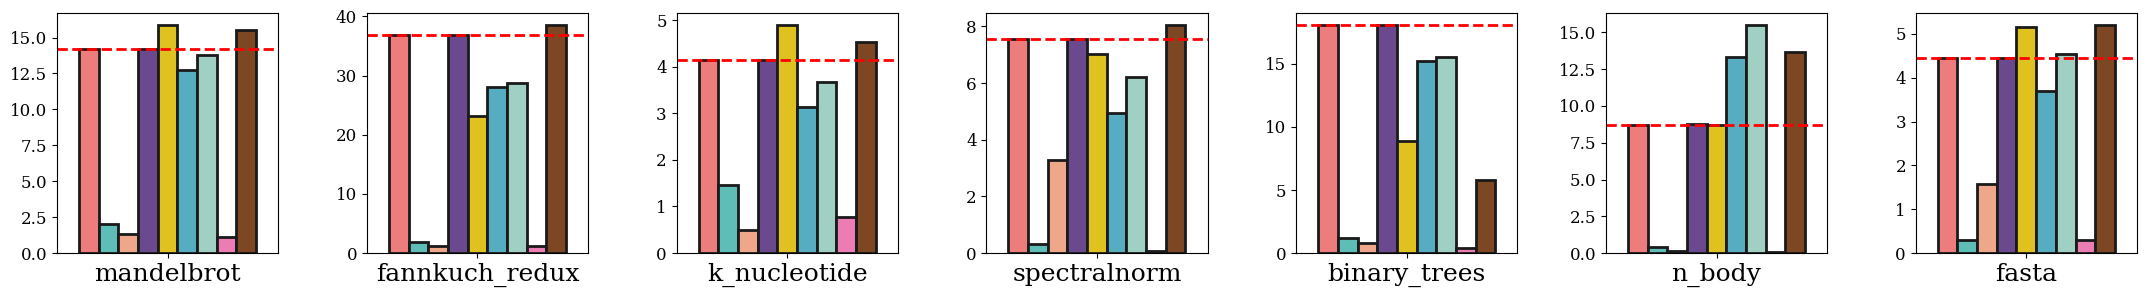

In [46]:
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
fig, axes = plt.subplots(1, 7, figsize=(26, 3))
axs_flat = axes.flatten()

for i in range(7):
    df = data[data['target'] == targets[i]]
    df.sort_values(by='subject')
    sns.barplot(
        x="target", y=METRIC, hue="subject", capsize = 0.5, errorbar=None, edgecolor = '0.1', lw=2, data=df, ax = axs_flat[i], dodge=True,
        palette=colors
    )

    axs_flat[i].get_legend().remove()
    axs_flat[i].set_xlabel('')
    axs_flat[i].set_ylabel('')
    axs_flat[i].tick_params(axis='x', labelsize=18)
    
    first_bar = axs_flat[i].patches[0]
    bar_height = first_bar.get_height()
    axs_flat[i].axhline(y=bar_height, color='red', linestyle='--', linewidth=2)
        
plt.subplots_adjust(wspace=0)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, hspace=0.4, wspace=0.4)

plt.savefig(f"{SERVER}_{METRIC}.pdf", format="pdf", dpi=300, bbox_inches="tight", transparent=True)

plt.show()

## Normality

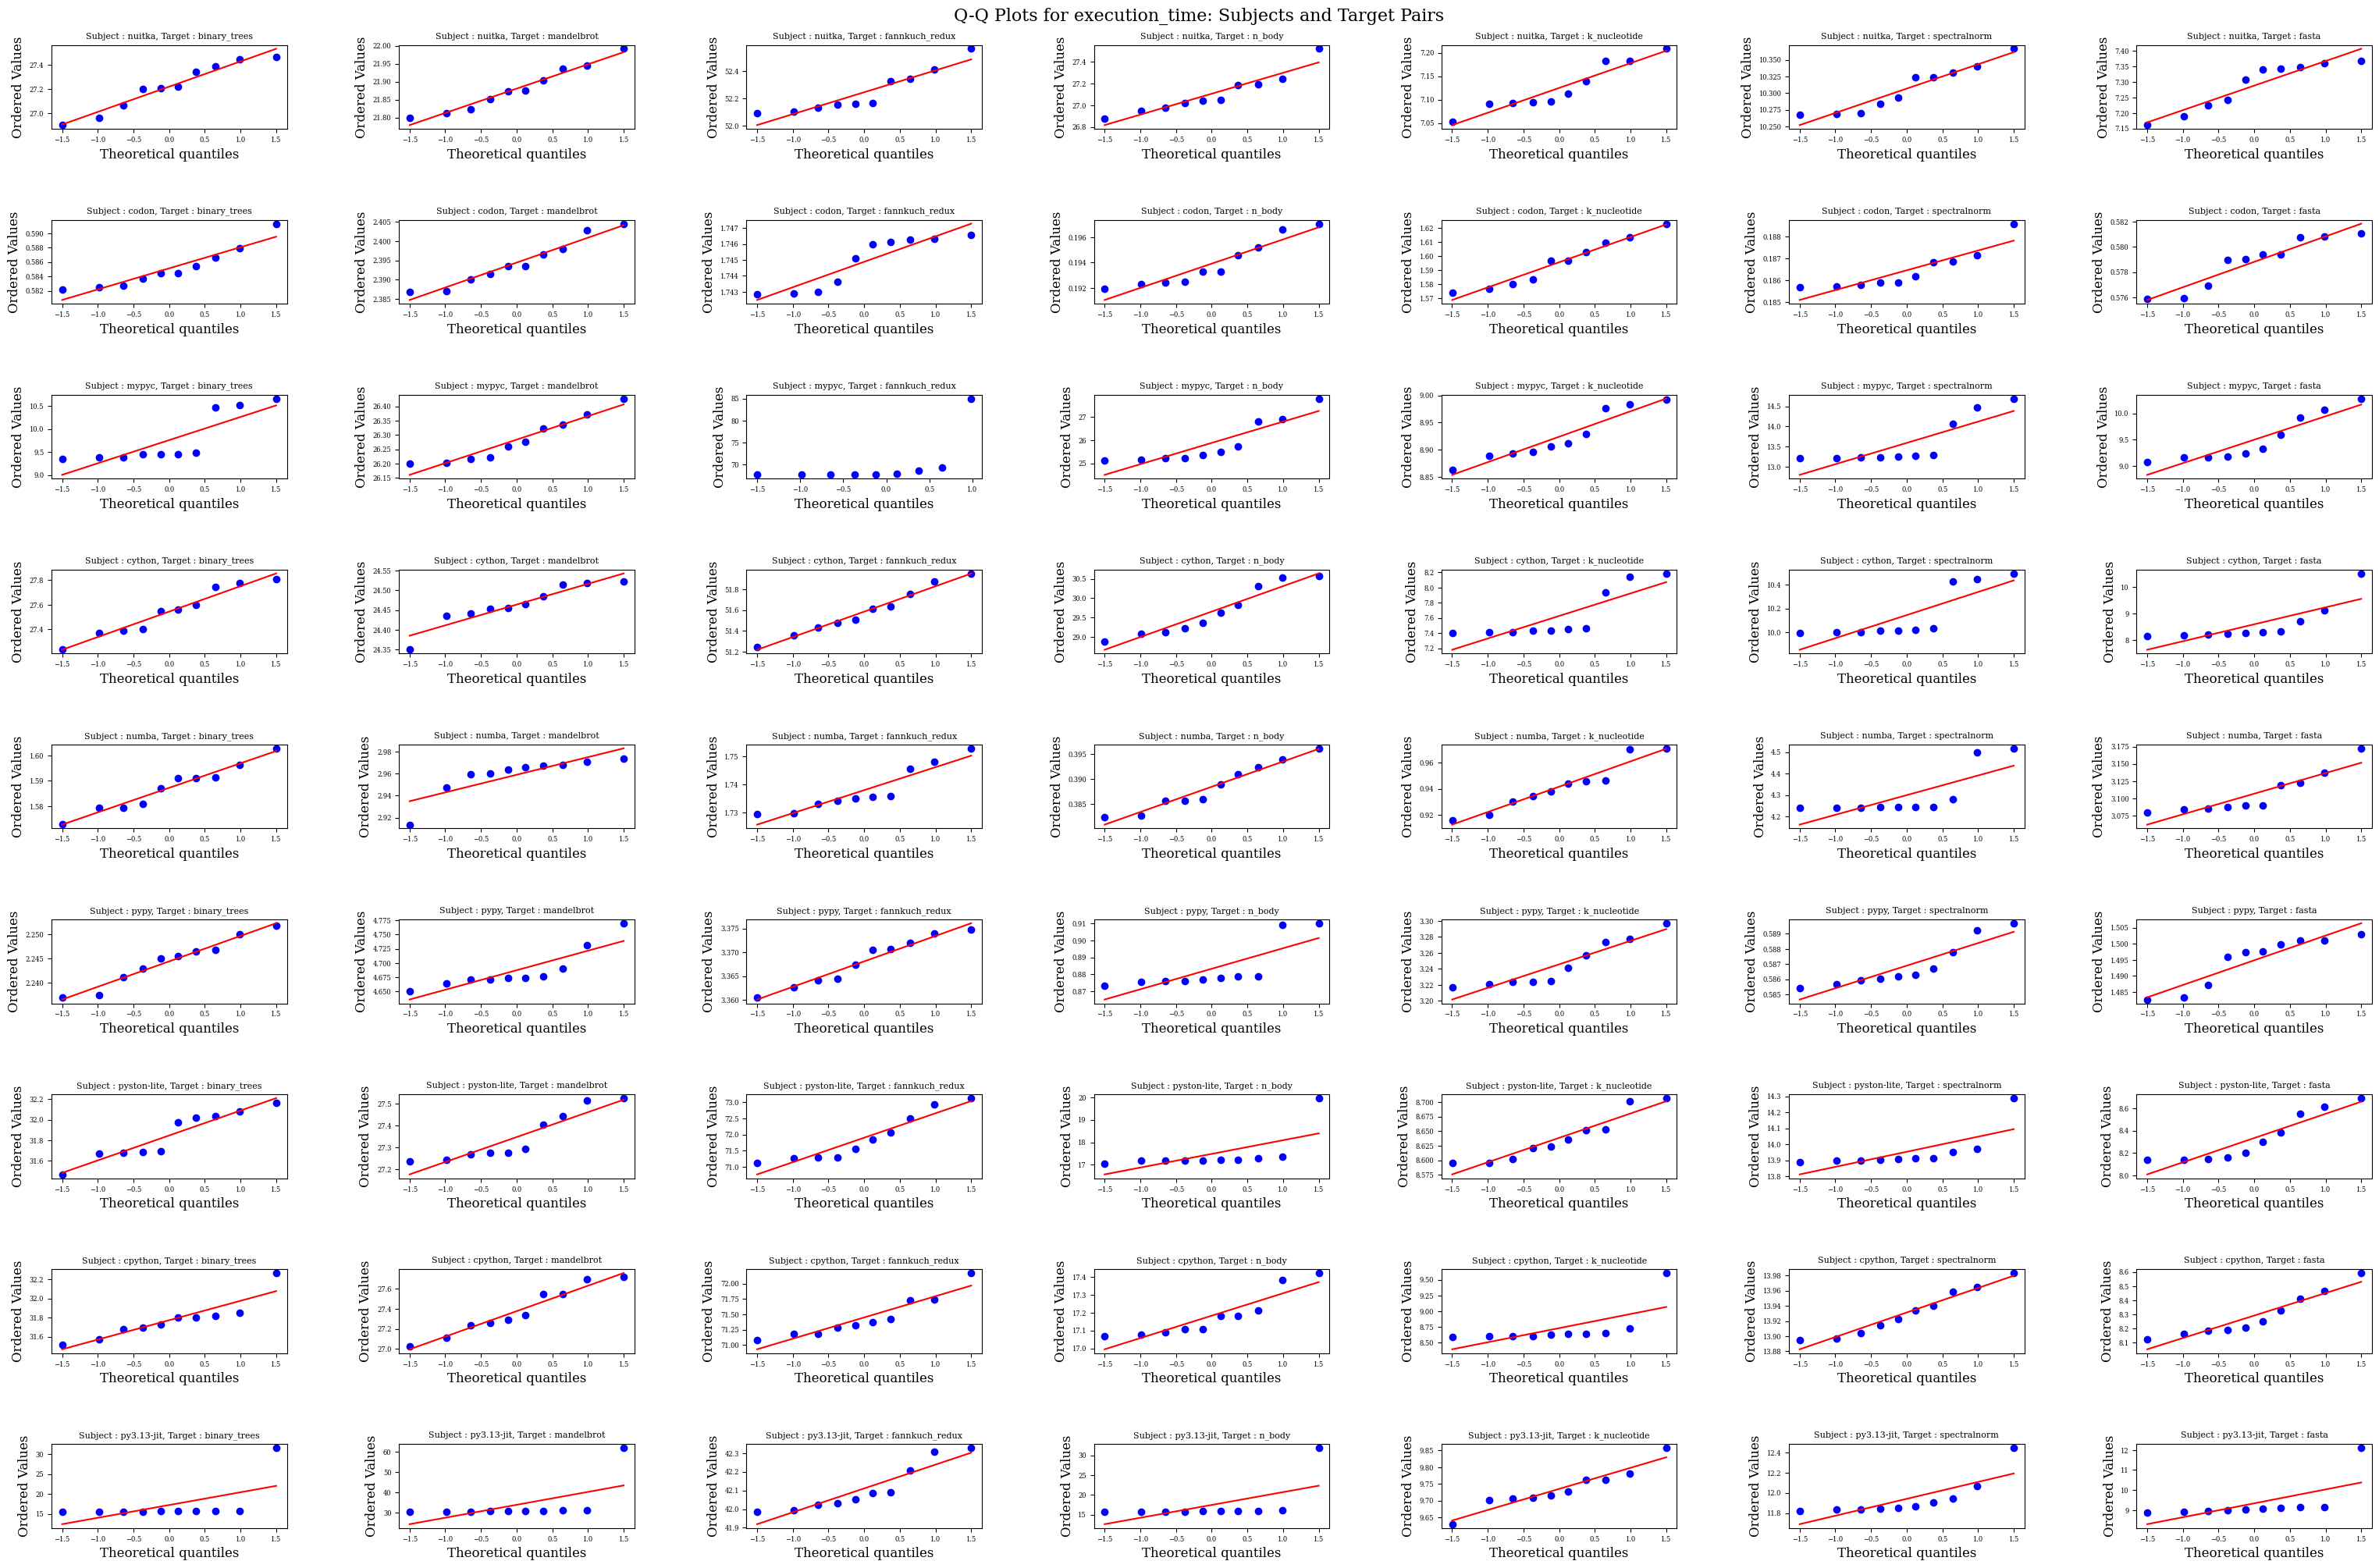

In [16]:
utils.plot_qq_grid(data, METRIC)

## Kruskal

from scipy.stats import kruskal

def calculate_kruskal(samples):
    stat, p_value = kruskal(*samples)
    return {'stat': stat, 'p_value': p_value}

utils.map_to_tasks(data, calculate_kruskal, METRIC)

## Cliffs Delta

from cliffs_delta import cliffs_delta

pd.set_option('display.max_rows', 1000)

cliffs_res = utils.compare_quantization(data, cliffs_delta, METRIC)

## Improvement and Delta